In [582]:
%%time
from datetime import datetime
a = datetime.now()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_palette("afmhot")
# sns.set_palette("twilight")
# sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')


CPU times: total: 0 ns
Wall time: 1.99 ms


In [583]:
%%time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Input, Activation
import tensorflow.keras as tfk

CPU times: total: 0 ns
Wall time: 0 ns


In [584]:
import sklearn.datasets
cancer=sklearn.datasets.load_breast_cancer()

In [585]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [586]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
y = cancer['target']

df['classification'] = y
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,classification
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


In [587]:
# 212 - Malignant ~ 0
# 357 - Benign ~ 1

In [588]:
df['classification']= df['classification'].apply(lambda x : 1 if x==0 else 0)

<AxesSubplot:xlabel='classification', ylabel='count'>

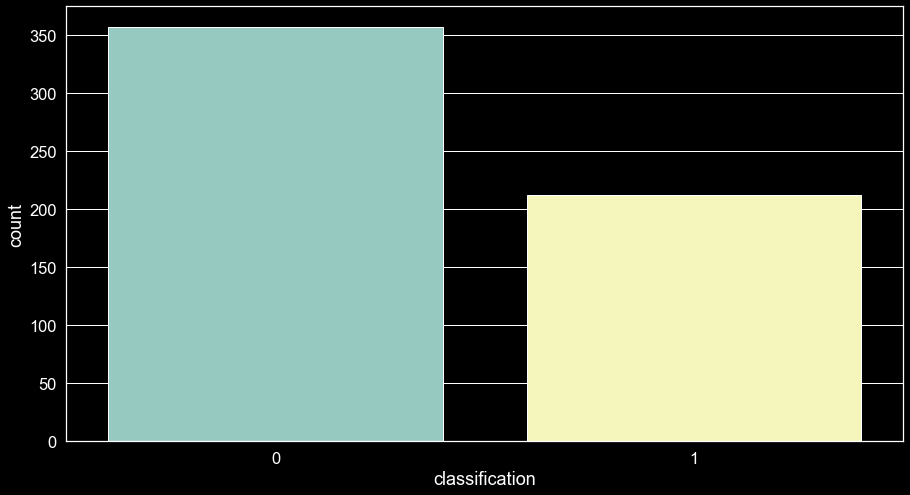

In [589]:
sns.countplot(data=df, x=df['classification'])

In [590]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()

In [591]:
target='classification'
y=df[target].values
# X = df.loc[df.columns != target]
X = df.loc[:,df.columns != target].values


In [592]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12312)

In [593]:
len(X_train), len(y_test)

(426, 143)

In [594]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [595]:
# model.add(Dense(128, input_dim=30, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))

# model.add(Dense(1, activation='sigmoid'))

In [596]:
from tensorflow.keras.layers import Dropout

In [597]:
model = Sequential()
model.add(Dense(64, input_dim=30, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

In [598]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [599]:
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 64)                1984      
                                                                 
 dropout_27 (Dropout)        (None, 64)                0         
                                                                 
 dense_88 (Dense)            (None, 32)                2080      
                                                                 
 dropout_28 (Dropout)        (None, 32)                0         
                                                                 
 dense_89 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________
None


In [600]:
%%time
history=model.fit(X_train,y_train, epochs=100,validation_data=(X_test,y_test),verbose=0)

CPU times: total: 10.6 s
Wall time: 7.9 s


In [601]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.672188,0.521127,0.647373,0.699301
1,0.621855,0.723005,0.591656,0.874126
2,0.566635,0.859155,0.526571,0.888112
3,0.502014,0.875587,0.455438,0.916084
4,0.424277,0.889671,0.386801,0.909091
...,...,...,...,...
95,0.044877,0.983568,0.118776,0.979021
96,0.042246,0.983568,0.112161,0.979021
97,0.048393,0.974178,0.120158,0.979021
98,0.050318,0.978873,0.109298,0.979021


In [602]:
hist = model.history.history

In [603]:
pd.DataFrame(hist)

,loss,accuracy,val_loss,val_accuracy
0,0.672188,0.521127,0.647373,0.699301
1,0.621855,0.723005,0.591656,0.874126
2,0.566635,0.859155,0.526571,0.888112
3,0.502014,0.875587,0.455438,0.916084
4,0.424277,0.889671,0.386801,0.909091
...,...,...,...,...
95,0.044877,0.983568,0.118776,0.979021
96,0.042246,0.983568,0.112161,0.979021
97,0.048393,0.974178,0.120158,0.979021
98,0.050318,0.978873,0.109298,0.979021


In [604]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 6ms/step - loss: 0.1203 - accuracy: 0.9790


[0.12031452357769012, 0.9790209531784058]

<AxesSubplot:>

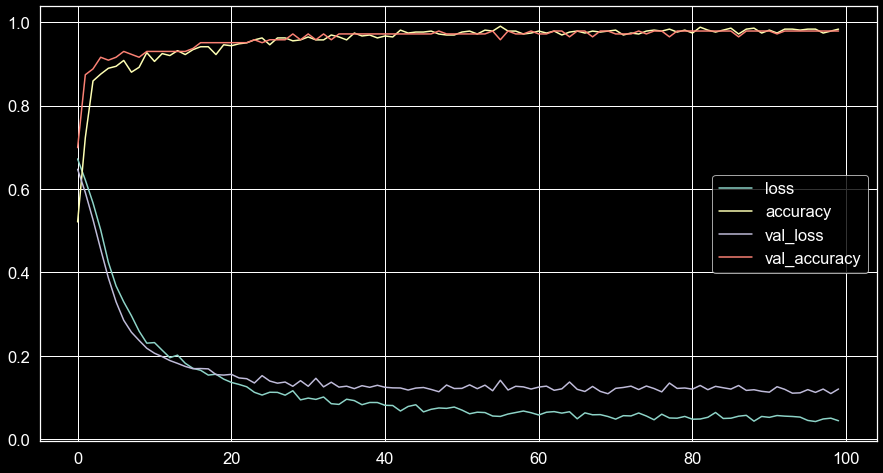

In [605]:
pd.DataFrame(hist).plot()

<AxesSubplot:>

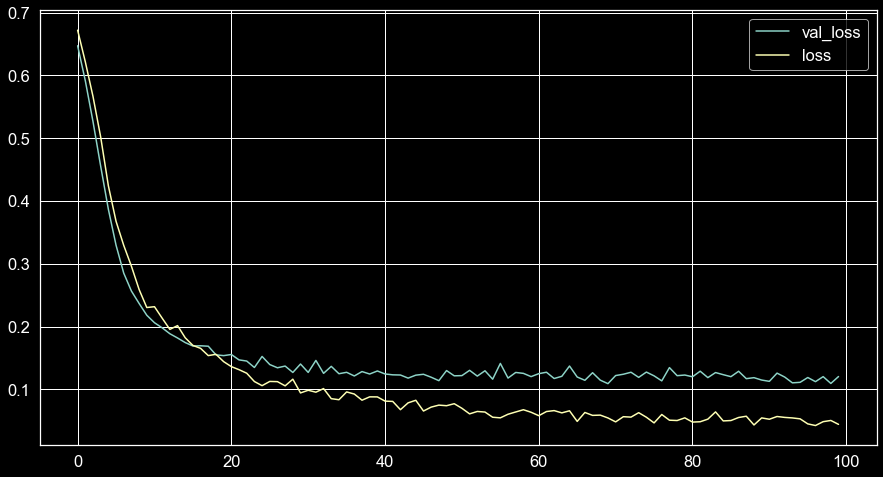

In [606]:
pd.DataFrame(hist)[['val_loss','loss']].plot()

<AxesSubplot:>

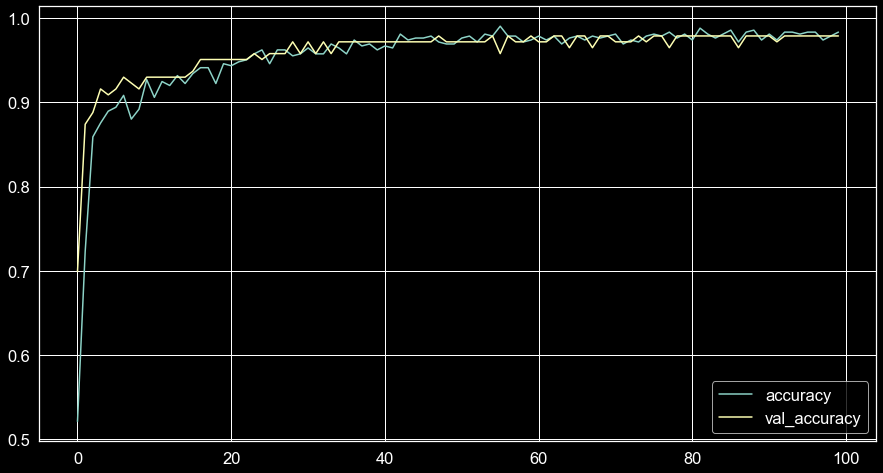

In [607]:
pd.DataFrame(hist)[['accuracy','val_accuracy']].plot()

In [608]:
pred = model.predict(X_test)

In [609]:
final = pd.DataFrame(pred, columns=['logit'])

In [610]:
final['binary']=final['logit'].apply(lambda x:1 if x>=0.50 else 0)

In [611]:
from sklearn.metrics import classification_report, confusion_matrix

In [612]:
print(classification_report(y_test,final['binary'].values))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        94
           1       1.00      0.94      0.97        49

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



<AxesSubplot:>

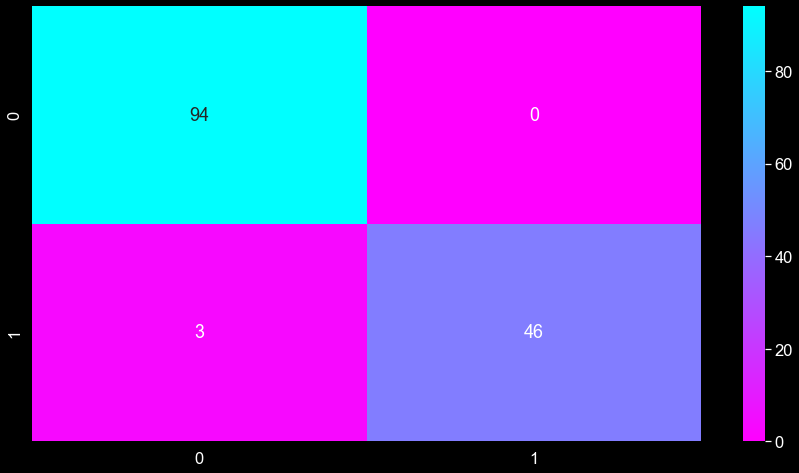

In [613]:
cm=confusion_matrix(y_test,final.binary)
sns.heatmap(cm,annot=True,cmap='cool_r')

In [614]:
# %%time
# for x in ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']:
#     print(f"{x}\n")
#     sns.heatmap(cm,annot=True, cmap=f'{x}')
#     plt.show()

In [615]:
print(datetime.now() - a)

0:00:09.585620
